In [1]:
pip install git+https://github.com/KindXiaoming/pykan.git

  Cloning https://github.com/KindXiaoming/pykan.git to /tmp/pip-req-build-9rgv0u55
  Running command git clone --filter=blob:none --quiet https://github.com/KindXiaoming/pykan.git /tmp/pip-req-build-9rgv0u55
  Resolved https://github.com/KindXiaoming/pykan.git to commit f6ac7e25ed4cd99aba2b9c883d1cf25f959f6ac4
  Preparing metadata (setup.py) ... done
  Created wheel for pykan: filename=pykan-0.0.5-py3-none-any.whl size=44470 sha256=85ebe5c6a19f17945a0e8e0c5d2b4b70a6479dc2ea244d51b6a24de9cca0eb87
  Stored in directory: /tmp/pip-ephem-wheel-cache-7_04j89g/wheels/47/ca/5a/98124e020f3119f51c17f78738c621c140b7aa803b0feda76e
Successfully built pykan


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder

In [8]:
# Separate the features and the target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Define the categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_cols])
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_cols)

# Apply OneHotEncoder to categorical columns
# encoder = LabelEncoder()
# X_categorical_encoded = X[categorical_cols].apply(encoder.fit_transform)
# X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded)

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_cols])
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine scaled numerical features and encoded categorical features
X_transformed = pd.concat([X_numerical_scaled_df, X_categorical_encoded_df,X.FastingBS], axis=1)

# Display the transformed DataFrame
X_transformed.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,FastingBS
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [9]:
X_transformed.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,-1.083616e-16,1.000545,-2.706015,-0.690629,0.051881,0.688318,2.491558
RestingBP,918.0,1.954380e-16,1.000545,-7.154995,-0.669935,-0.129513,0.410909,3.653439
Cholesterol,918.0,0.000000e+00,1.000545,-1.818435,-0.233704,0.221363,0.623835,3.697252
MaxHR,918.0,4.953675e-16,1.000545,-3.018469,-0.660578,0.046790,0.754157,2.561874
Oldpeak,918.0,1.238419e-16,1.000545,-3.271482,-0.832432,-0.269575,0.574711,4.983762
Sex_M,918.0,7.897603e-01,0.407701,0.000000,1.000000,1.000000,1.000000,1.000000
ChestPainType_ATA,918.0,1.884532e-01,0.391287,0.000000,0.000000,0.000000,0.000000,1.000000
ChestPainType_NAP,918.0,2.211329e-01,0.415236,0.000000,0.000000,0.000000,0.000000,1.000000
ChestPainType_TA,918.0,5.010893e-02,0.218289,0.000000,0.000000,0.000000,0.000000,1.000000
RestingECG_Normal,918.0,6.013072e-01,0.489896,0.000000,0.000000,1.000000,1.000000,1.000000


###MLP

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, ELU
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [12]:
# Build a neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(8))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=200, batch_size=100, validation_split=0.25, callbacks=[early_stop])

Epoch 1/200
6/6 [==============================] - 2s 60ms/step - loss: 0.7339 - accuracy: 0.5236 - val_loss: 0.6783 - val_accuracy: 0.5761
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.6018 - val_loss: 0.6587 - val_accuracy: 0.5707
Epoch 3/200
6/6 [==============================] - 0s 16ms/step - loss: 0.6839 - accuracy: 0.5982 - val_loss: 0.6413 - val_accuracy: 0.6250
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 0.6459 - accuracy: 0.6200 - val_loss: 0.6260 - val_accuracy: 0.6359
Epoch 5/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6405 - accuracy: 0.6382 - val_loss: 0.6130 - val_accuracy: 0.6576
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6201 - accuracy: 0.6745 - val_loss: 0.6005 - val_accuracy: 0.7011
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6015 - accuracy: 0.6964 - val_loss: 0.5882 - val_accuracy: 0.7283
Epoch 8/200
6/6 [=====

In [13]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

6/6 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

[[65 12]
 [15 92]]


###KANs to the action!!

In [14]:
from kan import *
import torch
import math
from torch.utils.data import Dataset, DataLoader

In [15]:
X_tensor = torch.tensor(X_transformed.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)  # Reshape y to be 2D (n_samples, 1)


In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [17]:
# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        sample = {'input': self.X[idx], 'label': self.y[idx]}
        return sample

# Create instances of the custom dataset for train and test sets
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

# Structure the dataset dictionary
dataset = {
    'train_input': train_dataset.X,
    'test_input': test_dataset.X,
    'train_label': train_dataset.y,
    'test_label': test_dataset.y
}

In [18]:
# Example of printing the structured dataset
print("Dataset:")
print("Train input shape:", dataset['train_input'].shape)
print("Train label shape:", dataset['train_label'].shape)
print("Test input shape:", dataset['test_input'].shape)
print("Test label shape:", dataset['test_label'].shape)

Dataset:
Train input shape: torch.Size([734, 15])
Train label shape: torch.Size([734, 1])
Test input shape: torch.Size([184, 15])
Test label shape: torch.Size([184, 1])


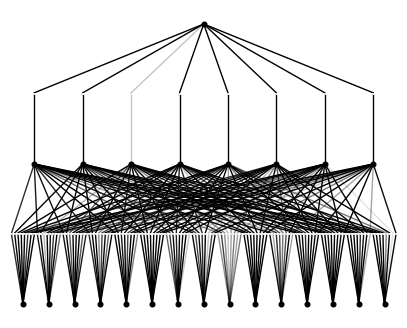

In [29]:
# create a KAN: 15D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[15,8,1], grid=5, k=3, seed=0)

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [47]:
# train the model
model.train(dataset, opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=10.)

train loss: 3.00e-01 | test loss: 3.43e-01 | reg: 3.76e+01 : 100%|██| 50/50 [00:12<00:00,  3.95it/s]


{'train_loss': [array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.29962465, dtype=float32),
  array(0.2996

Plot trained KAN

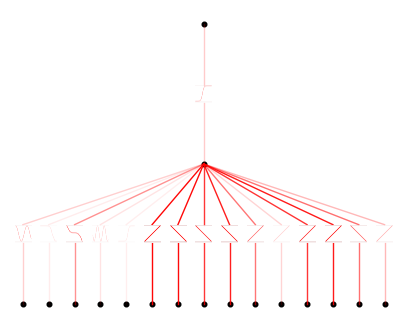

In [48]:
model.plot()

Prune KAN and replot (keep the original shape)

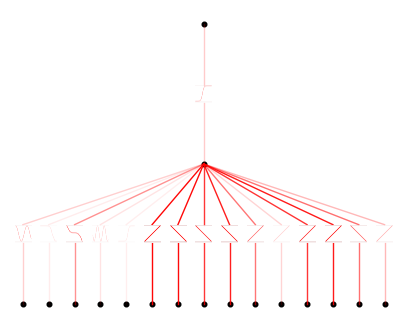

In [49]:
model.prune()
model.plot(mask=True)

Prune KAN and replot (get a smaller shape)

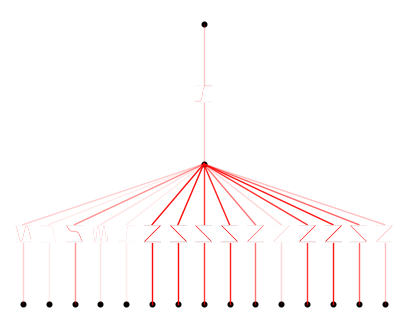

In [50]:
model = model.prune()
model(dataset['train_input'])
model.plot()

Continue training and replot

In [51]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 2.97e-01 | test loss: 3.55e-01 | reg: 1.11e+01 : 100%|██| 50/50 [00:14<00:00,  3.41it/s]


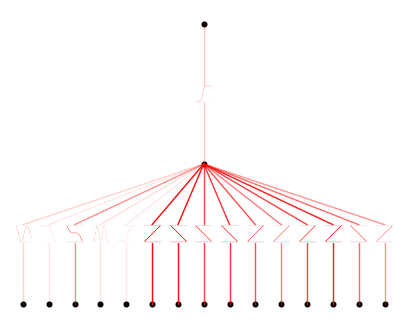

In [52]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [53]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,2,0) since already symbolic
skipping (0,3,0) since already symbolic
skipping (0,4,0) since already symbolic
skipping (0,5,0) since already symbolic
skipping (0,6,0) since already symbolic
skipping (0,7,0) since already symbolic
skipping (0,8,0) since already symbolic
skipping (0,9,0) since already symbolic
skipping (0,10,0) since already symbolic
skipping (0,11,0) since already symbolic
skipping (0,12,0) since already symbolic
skipping (0,13,0) since already symbolic
skipping (0,14,0) since already symbolic
skipping (1,0,0) since already symbolic


Continue training to almost machine precision

In [54]:
model.train(dataset, opt="LBFGS", steps=50);

train loss: 2.97e-01 | test loss: 3.51e-01 | reg: 1.10e+01 : 100%|██| 50/50 [00:12<00:00,  4.10it/s]


Obtain the symbolic formula

In [55]:
model.symbolic_formula()[0][0]

0.44*tanh(24.01*(0.55 - x_9)**4 + 0.09*(0.68 - x_3)**3 - 2.25*(0.72 - x_15)**4 - 1.43*(0.75 - x_11)**3 - 0.06*exp(2.4*x_14) + 0.45*log(9.51 - 8.69*x_7) - 0.73*sin(1.65*x_1 + 3.08) - 1.1*sin(9.93*x_13 + 0.86) + 0.7*sin(2.79*x_4 + 4.96) - 0.53*tanh(1.32*x_2 - 2.65) + 1.12*tanh(2.46*x_5 - 2.44) + 1.01*tanh(4.93*x_6 - 0.89) + 0.08*Abs(9.11*x_10 - 0.6) + 0.13*Abs(9.62*x_8 - 9.6) - 2.3 - 1.47*exp(-2.72*x_12)) + 0.47

In [60]:
def custom_function(x): # [15,8,1] steps=20
    result = 0.44 * torch.tanh(
        22.2 * (0.55 - x[8])**4 +
        0.08 * (0.68 - x[2])**3 -
        1.89 * (0.72 - x[14])**4 -
        1.63 * (0.75 - x[10])**3 -
        0.06 * torch.exp(2.4 * x[13]) +
        0.49 * torch.log(9.51 - 8.7 * x[6]) -
        0.8 * torch.sin(1.67 * x[0] + 3.03) -
        1.03 * torch.sin(9.92 * x[12] + 0.85) +
        0.58 * torch.sin(2.96 * x[3] + 4.82) -
        0.68 * torch.tanh(1.35 * x[1] - 2.63) +
        0.9 * torch.tanh(2.52 * x[4] - 2.38) +
        0.94 * torch.tanh(4.93 * x[5] - 0.88) +
        0.07 * torch.abs(9.11 * x[9] - 0.6) +
        0.13 * torch.abs(9.62 * x[7] - 9.6) -
        2.48 -
        1.44 * torch.exp(-2.72 * x[11])
    ) + 0.47
    return result

In [56]:
def custom_function(x):# [15,8,1] steps=50
    result = 0.44 * torch.tanh(
        24.01 * (0.55 - x[8])**4 +
        0.09 * (0.68 - x[2])**3 -
        2.25 * (0.72 - x[14])**4 -
        1.43 * (0.75 - x[10])**3 -
        0.06 * torch.exp(2.4 * x[13]) +
        0.45 * torch.log(9.51 - 8.69 * x[6]) -
        0.73 * torch.sin(1.65 * x[0] + 3.08) -
        1.1 * torch.sin(9.93 * x[12] + 0.86) +
        0.7 * torch.sin(2.79 * x[3] + 4.96) -
        0.53 * torch.tanh(1.32 * x[1] - 2.65) +
        1.12 * torch.tanh(2.46 * x[4] - 2.44) +
        1.01 * torch.tanh(4.93 * x[5] - 0.89) +
        0.08 * torch.abs(9.11 * x[9] - 0.6) +
        0.13 * torch.abs(9.62 * x[7] - 9.6) -
        2.3 -
        1.47 * torch.exp(-2.72 * x[11])
    ) + 0.47
    return result

In [61]:
y_test.shape



torch.Size([184, 1])

In [62]:
# Convert X_test to numpy array
X_test_np = X_test.numpy()

# Compute predictions for each row in X_test
y_pred_list = []
for i in range(X_test_np.shape[0]):
    x = X_test_np[i]
    y_pred = custom_function(torch.tensor(x, dtype=torch.float32))
    y_pred_list.append(y_pred)  # Assuming you want a list of scalar values

# Convert y_pred_list to torch tensor
y_pred_tensor = torch.tensor(y_pred_list, dtype=torch.float32).unsqueeze(1)
y_pred_binary = (y_pred_tensor >= 0.5).float()
# Print y_pred_tensor shape (should be (184,))
print("y_pred shape:", y_pred_tensor.shape)

y_pred shape: torch.Size([184, 1])


In [63]:
# Flatten tensors to 1D arrays (if necessary)
y_pred_flat = y_pred_binary.flatten().numpy()  # Flatten to 1D numpy array
y_test_flat = y_test.flatten().numpy()  # Flatten to 1D numpy array

# Generate classification report
report = classification_report(y_test_flat, y_pred_flat)

print("Classification Report:")
print(report)

cm = confusion_matrix(y_test_flat, y_pred_flat)

print("\nConfusion Matrix:")
print(cm)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82        77
         1.0       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184


Confusion Matrix:
[[67 10]
 [19 88]]
